# ImmoEliza Data Analysis (test)

**This repository is contains Data Analysis for a fictional real estate company called "ImmoEliza". I created it as part of my [BeCode](https://www.becode.org) AI Bootcamp training in 2023.**

The data used in this project was sourced from the repository [ImmoEliza: Collecting Data](https://github.com/DeFre/ImmoEliza-collecting-data) which was used to collect data on 10.000 properties from Immoweb.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import time

pd.set_option('display.min_rows', 10)

## Import Data

In [2]:
properties_raw = pd.read_csv("../data/scraped_data_10.csv")
display(properties_raw)

,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,...,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,immo_code,postal code
0,€,Grote Markt 22,4,C,218,No,0,30,0,0,...,As new,0,1,0,0,2,0,Gas,10666429,2300
1,€469000,Heidestatiestraat 26,3,D,390,No,Yes,0,760,34,...,0,0,1,0,0,2,Installed,0,10666428,2910
2,€1395000,"Rue de Wavre, 27",5,C,178,0,0,60,6468,50,...,Good,0,2,3,Yes,4,Hyper equipped,Fuel oil,10666426,1301
3,€285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,Good,0,2,0,0,2,Installed,Electric,10666424,6700
4,€285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,Good,0,2,0,0,2,Installed,Electric,10666423,6700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10133,€1199000,Donksesteenweg 212,6,B,199,No,Yes,0,2790,0,...,As new,0,2,0,No,3,Installed,Gas,10642946,2970
10134,€450000,Herbert Hooverplein 14,3,B,120,No,0,9,0,0,...,Good,0,2,0,0,0,Hyper equipped,Gas,3360,20
10135,€699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,No,0,0,0,0,...,0,0,2,0,0,0,0,0,1420,27
10136,€340000,Markeplaats 9,4,B,161,0,Yes,0,621,0,...,0,0,0,0,No,0,0,0,10642937,8560


## Export Data
The two blocks below can be turned into Code Blocks depending on how you want to export your data. Keep them as markdown if you want to use Run All (Above).

### Overwrite outputfile
"""This codeblock OVERWRITES THE EXISTING OUTPUT FILE in the same folder as this notebook"""
data_to_save = properties_raw
reference = ""  #add/change reference (datasource/user). Add leading underscore to increase readability
output_filename = "saved_data" + reference + ".csv" #assemble filename
data_to_save.to_csv(output_filename)

### Export to new timestamped file in /datadump (and overwrite existing output file)
"""This codeblock saves the dataframe in a NEW FILE WITH TIMESTAMP in the /datadump folder"""
data_to_save = properties_raw
data_to_save.to_csv("../data/saved_data.csv") #uncomment this line if you want to overwrite saved_data.csv AND create a timestamped dump
reference = ""    #add/change reference (datasource/user). Add leading underscore to increase readability
timestamp = time.strftime("%Y%m%d-%H%M%S") #add date and time of creation
output_path = "../data/datadump/"     #leave empty to save the file in the same folder as your code, 
output_filename = output_path + "saved_data_" + reference + timestamp  + ".csv" #assemble filename
data_to_save.to_csv(output_filename)

## Cleaning Data

### Remove "empty" rows and rows without a price

In [3]:
# Remove "empty" rows and rows without a price

print(properties_raw.shape[0])
#properties_raw = properties_raw.drop(properties_raw[(properties_raw.Price == 0) & (properties_raw.Address == 0) & (properties_raw.Bedrooms == 0) & (properties_raw.Furnished == 0)].index, inplace=True) #remove lines full of 0
properties_raw = properties_raw[properties_raw.iloc[:, 1].astype(str).str.strip() != '0'] #solution by Jonathan #removes "empty" rows
print(properties_raw.shape[0])
properties_raw = properties_raw[properties_raw.iloc[:, 0].astype(str).str.strip() != '€'] #removes rows without a price
#display(properties_raw)
print(properties_raw.shape[0])


10138
9482
9014


### Remove all non-numerical data from Price

In [4]:
# Remove all non-numerical data from Price

properties_raw["Price2"] = properties_raw.iloc[:, 0].str.replace("\D", "", regex = True)


In [5]:
print(properties_raw.shape[0])
properties_raw = properties_raw[properties_raw.loc[:, "Price2"].astype(str).str.strip() != ''] #remove rows without a price
properties_raw["Price2"] = properties_raw["Price2"].astype(int) #Turn "Price 2 into an Integer"
print(properties_raw.shape[0])

9014
8870


In [6]:
print("raw: ",properties_raw.shape[0])
properties_raw = properties_raw.drop(properties_raw[properties_raw['Price2'] > 30000000].index) #removes properties costing more than 3M
print("limited to 3M:",properties_raw.shape[0])
properties_raw = properties_raw.drop(properties_raw[properties_raw['Price2'] < 9999].index) #removes properties costing less than 10K
#properties_limited = properties_raw[properties_raw.iloc[:, 22].astype(int).int.strip() > 9999] #removes rows costing less than 10000
print("new limited 10K-3M:",properties_raw.shape[0])

raw:  8870
limited to 3M: 8865
new limited 10K-3M: 8736


In [7]:
properties_raw["Price_orig"] = properties_raw["Price"]
properties_raw["Price"] = properties_raw["Price2"]
properties_raw.drop(["Price2"], axis=1)
display(properties_raw)

,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,...,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,immo_code,postal code,Price2,Price_orig
1,469000,Heidestatiestraat 26,3,D,390,No,Yes,0,760,34,...,1,0,0,2,Installed,0,10666428,2910,469000,€469000
2,1395000,"Rue de Wavre, 27",5,C,178,0,0,60,6468,50,...,2,3,Yes,4,Hyper equipped,Fuel oil,10666426,1301,1395000,€1395000
3,285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,2,0,0,2,Installed,Electric,10666424,6700,285000,€285000
4,285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,2,0,0,2,Installed,Electric,10666423,6700,285000,€285000
5,425000,"Grote steenweg, 511",2,C,254,0,0,4,0,40,...,1,0,0,0,Installed,0,10666422,2000,425000,€425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10133,1199000,Donksesteenweg 212,6,B,199,No,Yes,0,2790,0,...,2,0,No,3,Installed,Gas,10642946,2970,1199000,€1199000
10134,450000,Herbert Hooverplein 14,3,B,120,No,0,9,0,0,...,2,0,0,0,Hyper equipped,Gas,3360,20,450000,€450000
10135,699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,No,0,0,0,0,...,2,0,0,0,0,0,1420,27,699000,€699000
10136,340000,Markeplaats 9,4,B,161,0,Yes,0,621,0,...,0,0,No,0,0,0,10642937,8560,340000,€340000


### Turns Furnished, Terrace & Office Binary

In [8]:
# Turn Yes/No into 1/0

for i in ["Furnished", "Terrace", "Office"]:
    print(properties_raw[[i]].value_counts())
    properties_raw[i] = properties_raw[i].map({'Yes': 1, 'No': 0, '0':0, 0:0, 1:1})
    print(properties_raw[[i]].value_counts())
#display(properties_raw)

Furnished
0            4463
No           4027
Yes           246
Name: count, dtype: int64
Furnished
0            8490
1             246
Name: count, dtype: int64
Terrace
0          6449
Yes        2287
Name: count, dtype: int64
Terrace
0          6449
1          2287
Name: count, dtype: int64
Office
0         5482
No        2032
Yes       1222
Name: count, dtype: int64
Office
0         7514
1         1222
Name: count, dtype: int64


In [9]:
display(properties_raw)

,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,...,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,immo_code,postal code,Price2,Price_orig
1,469000,Heidestatiestraat 26,3,D,390,0,1,0,760,34,...,1,0,0,2,Installed,0,10666428,2910,469000,€469000
2,1395000,"Rue de Wavre, 27",5,C,178,0,0,60,6468,50,...,2,3,1,4,Hyper equipped,Fuel oil,10666426,1301,1395000,€1395000
3,285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,2,0,0,2,Installed,Electric,10666424,6700,285000,€285000
4,285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,2,0,0,2,Installed,Electric,10666423,6700,285000,€285000
5,425000,"Grote steenweg, 511",2,C,254,0,0,4,0,40,...,1,0,0,0,Installed,0,10666422,2000,425000,€425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10133,1199000,Donksesteenweg 212,6,B,199,0,1,0,2790,0,...,2,0,0,3,Installed,Gas,10642946,2970,1199000,€1199000
10134,450000,Herbert Hooverplein 14,3,B,120,0,0,9,0,0,...,2,0,0,0,Hyper equipped,Gas,3360,20,450000,€450000
10135,699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,0,0,0,0,0,...,2,0,0,0,0,0,1420,27,699000,€699000
10136,340000,Markeplaats 9,4,B,161,0,1,0,621,0,...,0,0,0,0,0,0,10642937,8560,340000,€340000


In [10]:
properties_raw["Terrace2"] = np.where(properties_raw["Terrace surface"] !=0, 1, properties_raw["Terrace"])

In [11]:
print(properties_raw["Terrace"].value_counts())
print(properties_raw["Terrace2"].value_counts())

Terrace
0    6449
1    2287
Name: count, dtype: int64
Terrace2
1    5242
0    3494
Name: count, dtype: int64


In [12]:
properties_raw["Terrace"] = properties_raw["Terrace2"]
properties_raw.drop(["Terrace2"], axis=1)

,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,...,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,immo_code,postal code,Price2,Price_orig
1,469000,Heidestatiestraat 26,3,D,390,0,1,0,760,34,...,1,0,0,2,Installed,0,10666428,2910,469000,€469000
2,1395000,"Rue de Wavre, 27",5,C,178,0,1,60,6468,50,...,2,3,1,4,Hyper equipped,Fuel oil,10666426,1301,1395000,€1395000
3,285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,2,0,0,2,Installed,Electric,10666424,6700,285000,€285000
4,285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,2,0,0,2,Installed,Electric,10666423,6700,285000,€285000
5,425000,"Grote steenweg, 511",2,C,254,0,1,4,0,40,...,1,0,0,0,Installed,0,10666422,2000,425000,€425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10133,1199000,Donksesteenweg 212,6,B,199,0,1,0,2790,0,...,2,0,0,3,Installed,Gas,10642946,2970,1199000,€1199000
10134,450000,Herbert Hooverplein 14,3,B,120,0,1,9,0,0,...,2,0,0,0,Hyper equipped,Gas,3360,20,450000,€450000
10135,699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,0,0,0,0,0,...,2,0,0,0,0,0,1420,27,699000,€699000
10136,340000,Markeplaats 9,4,B,161,0,1,0,621,0,...,0,0,0,0,0,0,10642937,8560,340000,€340000


In [13]:
#There were 3 weird variables in Energy Class with only one occurence, namely 'G_F', 'C_B', 'G_A++'. Added them tot "Not specified"

properties_raw["Energy class"]=np.where(properties_raw["Energy class"].isin(['G_F', 'C_B', 'G_A++']), "Not specified", properties_raw["Energy class"])

In [14]:
print(properties_raw[["Energy class"]].value_counts())

Energy class 
Not specified    1962
B                1390
C                1303
D                1102
F                1086
E                 800
A                 562
G                 477
A++                31
A+                 23
Name: count, dtype: int64


In [15]:
properties_raw.rename(columns = {'postal code':'Postcode'}, inplace = True)
print(properties_raw[["Postcode"]].value_counts())

Postcode
20          507
8300        223
3           222
9000        193
8370        163
           ... 
6181          1
6142          1
6111          1
6044          1
100000        1
Name: count, Length: 846, dtype: int64


### Cleaning Postal codes
Postal Codes should be 4 numeric digits, but we have some errors.

In [16]:
print("raw: ",properties_raw.shape[0])
properties_raw = properties_raw.drop(properties_raw[properties_raw['Postcode'] > 9999].index) #removes properties costing more than 3M
print("limited too high:",properties_raw.shape[0])
properties_raw = properties_raw.drop(properties_raw[properties_raw['Postcode'] < 999].index) #removes properties costing less than 10K
#properties_limited = properties_raw[properties_raw.iloc[:, 22].astype(int).int.strip() > 9999] #removes rows costing less than 10000
print("4 digit:",properties_raw.shape[0])

raw:  8736
limited too high: 8711
4 digit: 7861


### Add Regions

In [17]:
df_localities = pd.read_csv("../data/postal_code-municipality-province.csv", encoding="latin-1")
df_localities = df_localities[['Postcode', 'Provincie']].drop_duplicates().reset_index(drop=True)
print(df_localities.head())

   Postcode                       Provincie
0      1000  Brussels Hoofdstedelijk Gewest
1      1030  Brussels Hoofdstedelijk Gewest
2      1040  Brussels Hoofdstedelijk Gewest
3      1050  Brussels Hoofdstedelijk Gewest
4      1060  Brussels Hoofdstedelijk Gewest


In [18]:
df_localities['Gemeenschap'] = np.where(
    df_localities.Provincie.isin(['Vlaams-Brabant', 'Antwerpen', 'Limburg', 'West-Vlaanderen', 'Oost-Vlaanderen']),
    'Flanders',
    np.where(df_localities.Provincie == 'Brussels Hoofdstedelijk Gewest',
             'Brussels',
             'Wallonia'
    )
)

In [19]:
df_localities["Postcode"].astype(int)
df_localities["Provincie"].astype(str)
df_localities["Gemeenschap"].astype(str)

0       Brussels
1       Brussels
2       Brussels
3       Brussels
4       Brussels
          ...   
1138    Flanders
1139    Flanders
1140    Flanders
1141    Flanders
1142    Flanders
Name: Gemeenschap, Length: 1143, dtype: object

In [20]:
df_localities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Postcode     1143 non-null   int64 
 1   Provincie    1143 non-null   object
 2   Gemeenschap  1143 non-null   object
dtypes: int64(1), object(2)
memory usage: 26.9+ KB


In [21]:
print(df_localities.sample(10))

      Postcode        Provincie Gemeenschap
253       4287          Liï¿½ge    Wallonia
852       5641            Namur    Wallonia
982       7332          Hainaut    Wallonia
64        1770   Vlaams-Brabant    Flanders
1095      9031  Oost-Vlaanderen    Flanders
485       8500  West-Vlaanderen    Flanders
538       9090  Oost-Vlaanderen    Flanders
260       4360          Liï¿½ge    Wallonia
456       7760          Hainaut    Wallonia
728       4020          Liï¿½ge    Wallonia


In [22]:
properties_raw = properties_raw.merge(df_localities, on=['Postcode'], how='left')
properties_raw.head()

,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,...,Toilets,Kitchen type,Heating type,immo_code,Postcode,Price2,Price_orig,Terrace2,Provincie,Gemeenschap
0,469000,Heidestatiestraat 26,3,D,390,0,1,0,760,34,...,2,Installed,0,10666428,2910,469000,€469000,1,Antwerpen,Flanders
1,1395000,"Rue de Wavre, 27",5,C,178,0,1,60,6468,50,...,4,Hyper equipped,Fuel oil,10666426,1301,1395000,€1395000,1,Brabant wallon,Wallonia
2,285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,2,Installed,Electric,10666424,6700,285000,€285000,0,Luxembourg,Wallonia
3,285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,2,Installed,Electric,10666423,6700,285000,€285000,0,Luxembourg,Wallonia
4,425000,"Grote steenweg, 511",2,C,254,0,1,4,0,40,...,0,Installed,0,10666422,2000,425000,€425000,1,Antwerpen,Flanders


In [23]:
properties_raw.rename(columns = {'Provincie':'Province', 'Gemeenschap':'Region'}, inplace = True)

### seperate Dataframe for Primary Energy Consumption vs Price

In [24]:
energy_price_df = properties_raw.loc[:,["Price", "Energy class", "Primary energy consumption", "Postcode", "Province", "Region"]]
display(energy_price_df.sample(10))

,Price,Energy class,Primary energy consumption,Postcode,Province,Region
7246,295000,A,18,9990,Oost-Vlaanderen,Flanders
2556,165000,F,823,8470,West-Vlaanderen,Flanders
302,395000,B,127,9820,Oost-Vlaanderen,Flanders
1783,289000,C,292,1700,Vlaams-Brabant,Flanders
3411,275000,E,251,1180,Brussels Hoofdstedelijk Gewest,Brussels
4956,549000,F,302,1000,Brussels Hoofdstedelijk Gewest,Brussels
1329,650000,E,244,1150,Brussels Hoofdstedelijk Gewest,Brussels
6965,495000,C,195,4800,Liï¿½ge,Wallonia
2177,469000,C,241,9310,Oost-Vlaanderen,Flanders
3529,15000,Not specified,Not specified,9980,Oost-Vlaanderen,Flanders


In [25]:
energy_price_df["Primary energy consumption"]=pd.to_numeric(energy_price_df["Primary energy consumption"], errors='coerce')
display(energy_price_df.sample(10))

,Price,Energy class,Primary energy consumption,Postcode,Province,Region
1551,465000,Not specified,NaN,9800,Oost-Vlaanderen,Flanders
7287,387000,Not specified,NaN,2870,Antwerpen,Flanders
3818,450000,G,376.0,1000,Brussels Hoofdstedelijk Gewest,Brussels
827,235000,E,419.0,9190,Oost-Vlaanderen,Flanders
5941,1650000,Not specified,NaN,9810,Oost-Vlaanderen,Flanders
3399,221500,B,115.0,6840,Luxembourg,Wallonia
7447,199000,F,1147.0,9960,Oost-Vlaanderen,Flanders
3409,215000,E,236.0,1070,Brussels Hoofdstedelijk Gewest,Brussels
4700,268750,Not specified,NaN,8370,West-Vlaanderen,Flanders
10,269000,D,396.0,1770,Vlaams-Brabant,Flanders


In [26]:
print("dropna:",energy_price_df.shape[0])
energy_price_df_pec_dropna = energy_price_df.dropna()
print("dropna:",energy_price_df_pec_dropna.shape[0])
energy_price_df_pec_dropna = energy_price_df_pec_dropna.drop(energy_price_df_pec_dropna[energy_price_df_pec_dropna["Primary energy consumption"] > 2000].index)
print("under2000:",energy_price_df_pec_dropna.shape[0])
display(energy_price_df_pec_dropna.sample(10))


dropna: 7861
dropna: 6074
under2000: 6068


,Price,Energy class,Primary energy consumption,Postcode,Province,Region
7414,629000,C,238.00,2018,Antwerpen,Flanders
3948,1950000,D,334.00,1340,Brabant wallon,Wallonia
2248,380000,F,343.00,1070,Brussels Hoofdstedelijk Gewest,Brussels
2408,279000,F,717.00,8970,West-Vlaanderen,Flanders
1466,219000,B,159.00,9420,Oost-Vlaanderen,Flanders
2760,469000,A,77.00,1500,Vlaams-Brabant,Flanders
2285,1200000,C,262.00,2321,Antwerpen,Flanders
7659,250000,E,486.00,8800,West-Vlaanderen,Flanders
6869,359000,D,388.00,9140,Oost-Vlaanderen,Flanders
1715,215000,A,77.34,9800,Oost-Vlaanderen,Flanders


### .info() & .describe()

In [27]:
properties_raw['Postcode'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7861 entries, 0 to 7860
Series name: Postcode
Non-Null Count  Dtype
--------------  -----
7861 non-null   int64
dtypes: int64(1)
memory usage: 61.5 KB


In [28]:
df_localities['Postcode'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1143 entries, 0 to 1142
Series name: Postcode
Non-Null Count  Dtype
--------------  -----
1143 non-null   int64
dtypes: int64(1)
memory usage: 9.1 KB


In [29]:
properties_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Price                       7861 non-null   int32 
 1   Address                     7861 non-null   object
 2   Bedrooms                    7861 non-null   int64 
 3   Energy class                7861 non-null   object
 4   Primary energy consumption  7861 non-null   object
 5   Furnished                   7861 non-null   int64 
 6   Terrace                     7861 non-null   int64 
 7   Terrace surface             7861 non-null   int64 
 8   Surface of the plot         7861 non-null   int64 
 9   Living room surface         7861 non-null   int64 
 10  Number of frontages         7861 non-null   int64 
 11  Construction year           7861 non-null   int64 
 12  Building condition          7861 non-null   object
 13  Outdoor parking space       7861 non-null   int6

In [30]:
sel_cols = list(properties_raw.select_dtypes(include='int64'))
sel_cols

['Bedrooms',
 'Furnished',
 'Terrace',
 'Terrace surface',
 'Surface of the plot',
 'Living room surface',
 'Number of frontages',
 'Construction year',
 'Outdoor parking space',
 'Bathrooms',
 'Shower rooms',
 'Office',
 'Toilets',
 'immo_code',
 'Postcode',
 'Terrace2']

In [31]:
sel_cols = list(properties_raw.select_dtypes(include='object'))
sel_cols

['Address',
 'Energy class',
 'Primary energy consumption',
 'Building condition',
 'Kitchen type',
 'Heating type',
 'Price_orig',
 'Province',
 'Region']

In [26]:
properties_raw.describe()

,Bedrooms,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,Number of frontages,Construction year,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,immo_code,Postcode,Price2,Terrace2
count,7861.000000,7861.000000,7861.000000,7861.000000,7.861000e+03,7861.000000,7861.000000,7861.000000,7861.0,7861.000000,7861.000000,7861.000000,7861.000000,7.861000e+03,7861.000000,7.861000e+03,7861.000000
mean,2.933087,0.023916,0.600560,8.431497,8.567911e+02,15.260272,1.935632,1214.433914,0.0,1.196540,0.315354,0.135606,1.301107,1.063018e+07,5368.327566,4.553970e+05,0.600560
std,1.845247,0.152796,0.489815,22.015344,1.298587e+04,33.546424,1.522496,962.087903,0.0,1.084552,2.029278,0.342392,1.337095,3.842752e+05,3183.431441,6.117457e+05,0.489815
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,-1.000000,0.000000,0.000000,2.000000e+01,1000.000000,1.000000e+04,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.064789e+07,2250.000000,2.450000e+05,0.000000
50%,3.000000,0.000000,1.000000,0.000000,1.200000e+02,0.000000,2.000000,1946.000000,0.0,1.000000,0.000000,0.000000,1.000000,1.065456e+07,5000.000000,3.390000e+05,1.000000
75%,4.000000,0.000000,1.000000,10.000000,5.370000e+02,30.000000,3.000000,1990.000000,0.0,1.000000,0.000000,0.000000,2.000000,1.066060e+07,8570.000000,4.850000e+05,1.000000
max,60.000000,1.000000,1.000000,663.000000,1.090481e+06,2340.000000,26.000000,2025.000000,0.0,27.000000,116.000000,1.000000,20.000000,1.066718e+07,9991.000000,2.713180e+07,1.000000


### Display Data

In [27]:
display(properties_raw)

,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,...,Office,Toilets,Kitchen type,Heating type,immo_code,Postcode,Price2,Terrace2,Province,Region
0,€469000,Heidestatiestraat 26,3,D,390,0,1,0,760,34,...,0,2,Installed,0,10666428,2910,469000,1,Antwerpen,Flanders
1,€1395000,"Rue de Wavre, 27",5,C,178,0,1,60,6468,50,...,1,4,Hyper equipped,Fuel oil,10666426,1301,1395000,1,Brabant wallon,Wallonia
2,€285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,0,2,Installed,Electric,10666424,6700,285000,0,Luxembourg,Wallonia
3,€285000,Avenue de Longwy 340,2,D,299,0,0,0,0,0,...,0,2,Installed,Electric,10666423,6700,285000,0,Luxembourg,Wallonia
4,€425000,"Grote steenweg, 511",2,C,254,0,1,4,0,40,...,0,0,Installed,0,10666422,2000,425000,1,Antwerpen,Flanders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7856,€465000,Bisschopslaan 16,2,B,189,0,1,0,1221,45,...,0,2,Hyper equipped,Gas,10642965,2460,465000,1,Antwerpen,Flanders
7857,€499000,Schrieksebaan 53B001,3,D,383,0,1,0,17656,0,...,1,2,Installed,0,10642957,3120,499000,1,Vlaams-Brabant,Flanders
7858,€1199000,Donksesteenweg 212,6,B,199,0,1,0,2790,0,...,0,3,Installed,Gas,10642946,2970,1199000,1,Antwerpen,Flanders
7859,€340000,Markeplaats 9,4,B,161,0,1,0,621,0,...,0,0,0,0,10642937,8560,340000,1,West-Vlaanderen,Flanders


## Graphs

In [32]:
ordered_E_class = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Not specified']
ordered_E_class_aplus_to_g = ['A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G']
print(ordered_E_class)

['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Not specified']


### Energy Class
(Including Not specified)

<Axes: xlabel='Energy class', ylabel='count'>

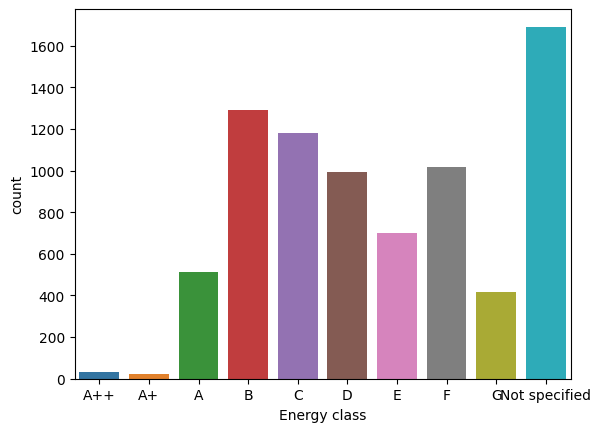

In [33]:
sns.countplot(x="Energy class", data=energy_price_df, order=ordered_E_class)

### Energy Class vs Price

[Text(0.5, 1.0, 'Energy Class versus Price'), Text(0, 0.5, 'Price in €')]

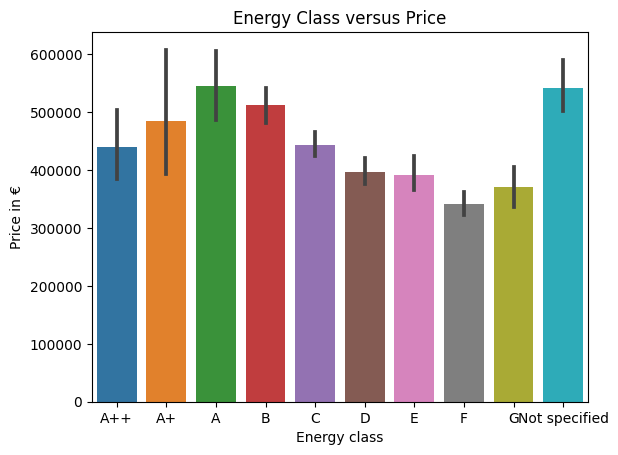

In [62]:
sns.barplot(x="Energy class", y="Price", data=energy_price_df, order=ordered_E_class).set(title = "Energy Class versus Price", ylabel='Price in €')

[Text(0.5, 1.0, 'Energy Class versus Price per Region'),
 Text(0, 0.5, 'Price in €')]

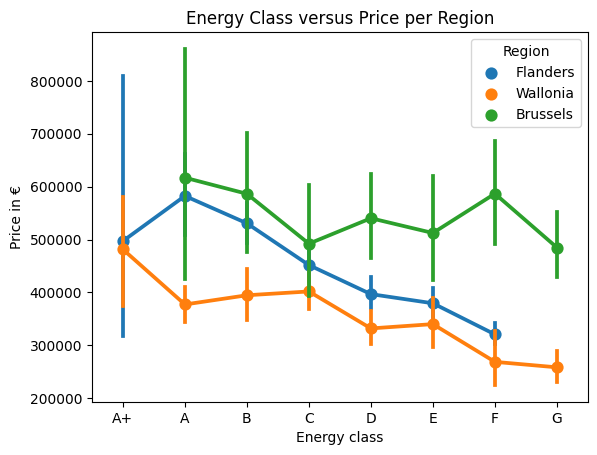

In [35]:
sns.pointplot(x="Energy class", y="Price", hue = "Region",data=energy_price_df, order=ordered_E_class_aplus_to_g,).set(title = "Energy Class versus Price per Region", ylabel='Price in €')

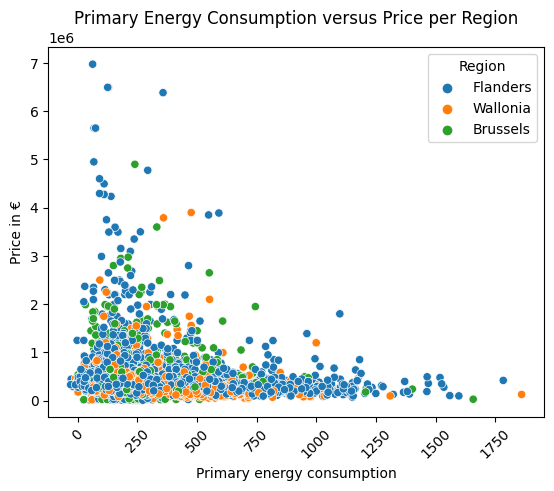

In [36]:
sns.scatterplot(x="Primary energy consumption", y="Price", hue = "Region",data=energy_price_df_pec_dropna).set(title = "Primary Energy Consumption versus Price per Region", ylabel='Price in €')
plt.xticks(rotation=45)
plt.show()

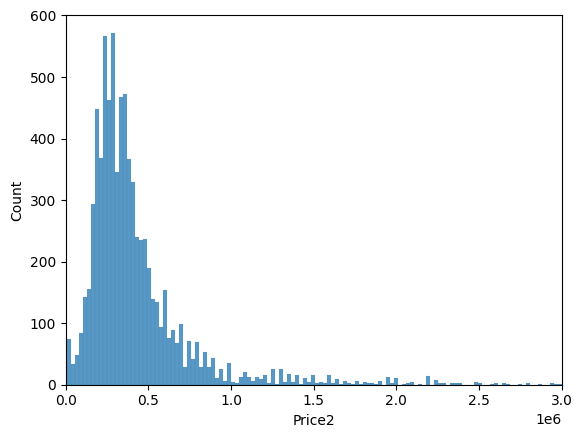

In [37]:
sns.histplot(x="Price", data=properties_raw)
plt.xlim(0, 3000000)
plt.show()

### Energy Classes

In [38]:
epc_be = pd.read_csv("../data/epc_be.csv")
display(epc_be)
sns.pointplot(x="Energy_label", data=epc_be)

,Energy_label,Flanders,Wallonia,Brussels
0,OMG,700.0,700,700.0
1,G,NaN,510,345.0
2,F,500.0,425,276.0
3,E,400.0,340,211.0
4,D,300.0,255,151.0
5,C,200.0,170,96.0
6,B,100.0,85,46.0
7,A,0.0,45,0.0
8,A+,-100.0,0,NaN


TypeError: Horizontal orientation requires numeric `x` variable.